In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from matplotlib.pyplot import savefig, figure
from itertools import combinations

In [7]:
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
font_size = 30
rc={'axes.labelsize': font_size, 'font.size': font_size, 'legend.fontsize': font_size, 'axes.titlesize': font_size}
plt.rcParams.update(**rc)
media_dir = 'Media/'

In [8]:
main = ['M.abscessus', 'M.avium', 'M.fortuitum', 'M.gordonae', 'M.kansasii']
micro_small = ['M.avium', 'M.gordonae', 'M.kansasii', 'chimaera-intracellulare', 'szulgai', 'pseudoshottsii',
              'lentiflavum', 'malmoense', 'seoulense', 'scrofulaceum', 'bohemicum', 'celatum', 'gastrii',
              'interjectum', 'xenopi', 'marseillense']
micro_large = ['M.abscessus', 'M.fortuitum', 'septicum', 'peregrinum', 'senegalense', 'fredericbergense', 'chelonae',
               'iranicum', 'monacense', 'flavescence']
non_micro = ['Tsukamurella', 'Nocardia', 'Gordonia']
non_clinic = ['gordonae', 'gastrii', 'septicum', 'fredericbergense', 'flavescence']

In [9]:
data = pd.read_excel('EDA_Medians.xlsx')
data.type = data.type.str.strip()

data.loc[data.type.isin(micro_small), 'macro_type'] = 'mr_htm'
data.loc[data.type.isin(micro_large), 'macro_type'] = 'br_htm'
data.loc[data.type.isin(non_micro), 'macro_type'] = 'non_micro'

data.loc[data.type.isin(micro_small + micro_large), 'is_micro'] = 'yes'
data.loc[data.type.isin(non_micro), 'is_micro'] = 'no'

data.loc[data.type.isin(non_clinic), 'is_clinic'] = 'no'
data.is_clinic.fillna('yes', inplace = True)

# Пять основных микробов

## Без разделения на пол

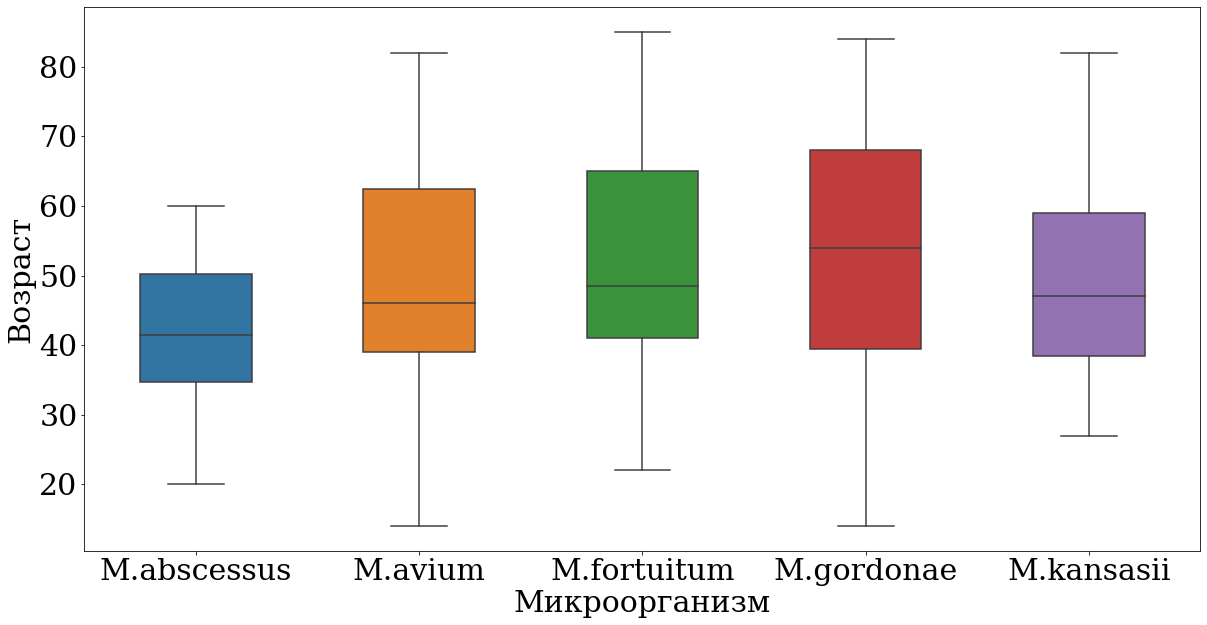

In [10]:
data_main = data.loc[data.type.isin(main), :]

figure(figsize = (20, 10))
sns.boxplot(x = 'type', y = 'age', data = data_main, width = 0.5).set(xlabel = 'Микроорганизм', ylabel = 'Возраст')
plt.savefig(media_dir + 'main.png')

In [11]:
d = pd.DataFrame(index = range(10), columns = ['micro1', 'micro2', 'U', 'p', 'inference'])
combs = list(combinations(main, 2))
for i, comb in enumerate(combs):
    wilx = scipy.stats.mannwhitneyu(data.loc[data.type == comb[0], 'age'], data.loc[data.type == comb[1], 'age'])
    infer = 'Значимо отличаются' if wilx[1] < 0.05 else 'Значимо НЕ отличаются'
    d.loc[i:i, 0:5] = comb[0], comb[1], wilx[0], np.round(wilx[1], 3), infer
print(d)

        micro1       micro2       U      p              inference
0  M.abscessus      M.avium   177.5  0.081  Значимо НЕ отличаются
1  M.abscessus  M.fortuitum    73.5  0.074  Значимо НЕ отличаются
2  M.abscessus   M.gordonae    70.5   0.04     Значимо отличаются
3  M.abscessus   M.kansasii    99.5  0.106  Значимо НЕ отличаются
4      M.avium  M.fortuitum     841  0.322  Значимо НЕ отличаются
5      M.avium   M.gordonae     828  0.143  Значимо НЕ отличаются
6      M.avium   M.kansasii  1078.5  0.382  Значимо НЕ отличаются
7  M.fortuitum   M.gordonae     381  0.274  Значимо НЕ отличаются
8  M.fortuitum   M.kansasii     448  0.283  Значимо НЕ отличаются
9   M.gordonae   M.kansasii   433.5  0.115  Значимо НЕ отличаются


In [12]:
avium = data.loc[data.type == 'avium', 'age']
abscessus = data.loc[data.type == 'abscessus', 'age']
fortuitum = data.loc[data.type == 'fortuitum', 'age']
gordonae = data.loc[data.type == 'gordonae', 'age']
kansasii = data.loc[data.type == 'kansasii', 'age']
print(scipy.stats.kruskal(avium, abscessus, fortuitum, gordonae, kansasii), '=> All populations have the same mean')

KruskalResult(statistic=nan, pvalue=nan) => All populations have the same mean


## С разделением на пол

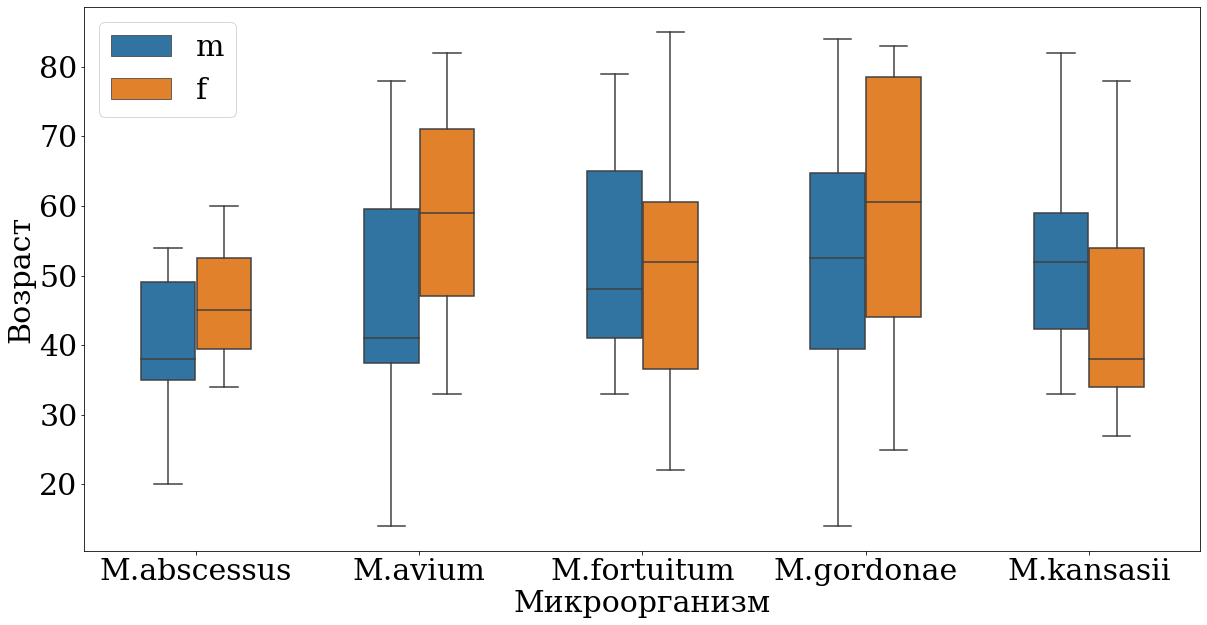

In [13]:
figure(figsize = (20, 10))
ax = sns.boxplot(x = 'type', y = 'age', hue = 'gender', data = data_main, width = 0.5)
ax.set(xlabel = 'Микроорганизм', ylabel = 'Возраст')
ax.legend().set_title('')
plt.savefig(media_dir + 'main_by_gender.png')

### Мужчины

In [14]:
d = pd.DataFrame(index = range(10), columns = ['micro1_male', 'micro2_male', 'U', 'p', 'inference'])
combs = list(combinations(main, 2))
for i, comb in enumerate(combs):
    wilx = scipy.stats.mannwhitneyu(data.loc[(data.type == comb[0]) & (data.gender == 'm'), 'age'],
                                            data.loc[data.type == comb[1], 'age'])
    infer = 'Значимо отличаются' if wilx[1] < 0.05 else 'Значимо НЕ отличаются'
    d.loc[i:i, 0:5] = comb[0], comb[1], wilx[0], np.round(wilx[1], 3), infer
print(d)

   micro1_male  micro2_male      U      p              inference
0  M.abscessus      M.avium   97.5  0.076  Значимо НЕ отличаются
1  M.abscessus  M.fortuitum     39  0.062  Значимо НЕ отличаются
2  M.abscessus   M.gordonae     39  0.047     Значимо отличаются
3  M.abscessus   M.kansasii     52  0.076  Значимо НЕ отличаются
4      M.avium  M.fortuitum  486.5  0.088  Значимо НЕ отличаются
5      M.avium   M.gordonae  487.5  0.039     Значимо отличаются
6      M.avium   M.kansasii    682  0.241  Значимо НЕ отличаются
7  M.fortuitum   M.gordonae    240  0.374  Значимо НЕ отличаются
8  M.fortuitum   M.kansasii    256  0.212  Значимо НЕ отличаются
9   M.gordonae   M.kansasii  282.5  0.274  Значимо НЕ отличаются


In [15]:
avium = data.loc[(data.type == 'M.avium') & (data.gender == 'm'), 'age']
abscessus = data.loc[(data.type == 'M.abscessus') & (data.gender == 'm'), 'age']
fortuitum = data.loc[(data.type == 'M.fortuitum') & (data.gender == 'm'), 'age']
gordonae = data.loc[(data.type == 'M.gordonae') & (data.gender == 'm'), 'age']
kansasii = data.loc[(data.type == 'M.kansasii') & (data.gender == 'm'), 'age']
print(scipy.stats.kruskal(avium, abscessus, fortuitum, gordonae, kansasii), '=> All populations have the same mean')

KruskalResult(statistic=6.025525231420313, pvalue=0.19725012609379577) => All populations have the same mean


### Женщины

In [16]:
d = pd.DataFrame(index = range(10), columns = ['micro1_female', 'micro2_female', 'U', 'p', 'inference'])
combs = list(combinations(main, 2))
for i, comb in enumerate(combs):
    wilx = scipy.stats.mannwhitneyu(data.loc[(data.type == comb[0]) & (data.gender == 'f'), 'age'],
                                            data.loc[data.type == comb[1], 'age'])
    infer = 'Значимо отличаются' if wilx[1] < 0.05 else 'Значимо НЕ отличаются'
    d.loc[i:i, 0:5] = comb[0], comb[1], wilx[0], np.round(wilx[1], 3), infer
print(d)

  micro1_female micro2_female      U      p              inference
0   M.abscessus       M.avium     80  0.319  Значимо НЕ отличаются
1   M.abscessus   M.fortuitum   34.5   0.32  Значимо НЕ отличаются
2   M.abscessus    M.gordonae   31.5  0.208  Значимо НЕ отличаются
3   M.abscessus    M.kansasii   47.5  0.404  Значимо НЕ отличаются
4       M.avium   M.fortuitum  233.5  0.112  Значимо НЕ отличаются
5       M.avium    M.gordonae  289.5  0.316  Значимо НЕ отличаются
6       M.avium    M.kansasii  255.5  0.029     Значимо отличаются
7   M.fortuitum    M.gordonae    141  0.245  Значимо НЕ отличаются
8   M.fortuitum    M.kansasii    192    0.5  Значимо НЕ отличаются
9    M.gordonae    M.kansasii    151  0.077  Значимо НЕ отличаются


In [17]:
avium = data.loc[(data.type == 'M.avium') & (data.gender == 'f'), 'age']
abscessus = data.loc[(data.type == 'M.abscessus') & (data.gender == 'f'), 'age']
fortuitum = data.loc[(data.type == 'M.fortuitum') & (data.gender == 'f'), 'age']
gordonae = data.loc[(data.type == 'M.gordonae') & (data.gender == 'f'), 'age']
kansasii = data.loc[(data.type == 'M.kansasii') & (data.gender == 'f'), 'age']
print(scipy.stats.kruskal(avium, abscessus, fortuitum, gordonae, kansasii), '=> All populations have the same mean')

KruskalResult(statistic=6.07038293329389, pvalue=0.19395333024838324) => All populations have the same mean


# Быстрорастущие, медленнорастущие и не микобактерии

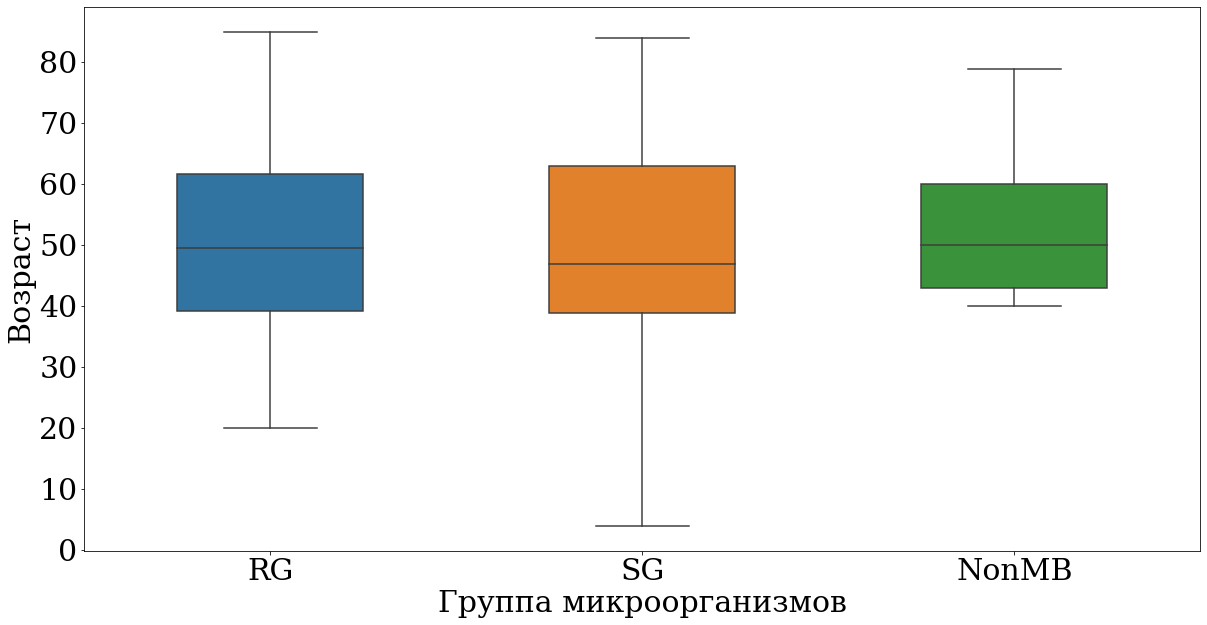

In [18]:
figure(figsize = (20, 10))
ax = sns.boxplot(x = 'macro_type', y = 'age', data = data, width = 0.5)
ax.set(xlabel = 'Группа микроорганизмов', ylabel = 'Возраст')
ax.set_xticklabels(['RG', 'SG', 'NonMB'])
plt.savefig(media_dir + 'br_mr_micro.png')

In [19]:
bp_htc = data.loc[data.macro_type == 'br_htm', 'age']
mp_htc = data.loc[data.macro_type == 'mr_htm', 'age']
non_mic = data.loc[data.macro_type == 'non_micro', 'age']
print(scipy.stats.kruskal(bp_htc, mp_htc, non_mic), '=> All populations have the same mean')

KruskalResult(statistic=0.2929018207760657, pvalue=0.8637681333365245) => All populations have the same mean


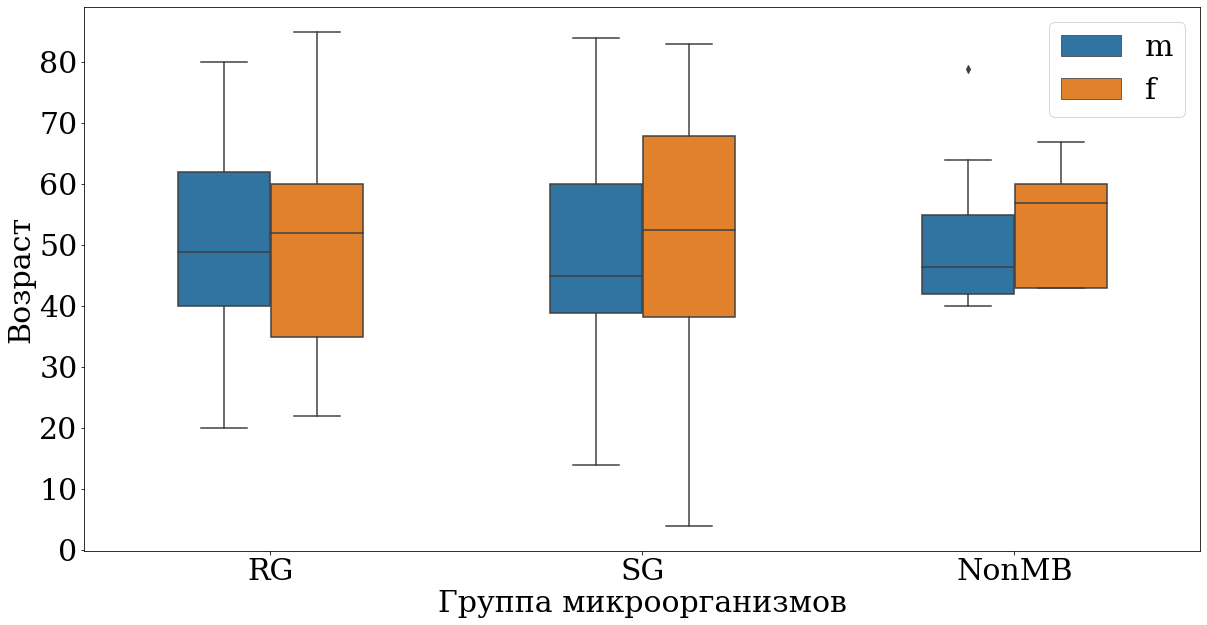

In [20]:
figure(figsize = (20, 10))
ax = sns.boxplot(x = 'macro_type', y = 'age', hue = 'gender', data = data, width = 0.5)
ax.set(xlabel = 'Группа микроорганизмов', ylabel = 'Возраст')
ax.set_xticklabels(['RG', 'SG', 'NonMB'])
ax.legend().set_title('')
plt.savefig(media_dir + 'br_mr_micro_by_gender.png')

### Мужчины

In [21]:
bp_htc = data.loc[(data.macro_type == 'br_htm') & (data.gender == 'm'), 'age']
mp_htc = data.loc[(data.macro_type == 'mr_htm') & (data.gender == 'm'), 'age']
non_mic = data.loc[(data.macro_type == 'non_micro') & (data.gender == 'm'), 'age']
print(scipy.stats.kruskal(bp_htc, mp_htc, non_mic), '=> All populations have the same mean')

KruskalResult(statistic=0.5654630071782546, pvalue=0.7537221323814525) => All populations have the same mean


### Женщины

In [22]:
bp_htc = data.loc[(data.macro_type == 'br_htm') & (data.gender == 'f'), 'age']
mp_htc = data.loc[(data.macro_type == 'mr_htm') & (data.gender == 'f'), 'age']
non_mic = data.loc[(data.macro_type == 'non_micro') & (data.gender == 'f'), 'age']
print(scipy.stats.kruskal(bp_htc, mp_htc, non_mic), '=> All populations have the same mean')

KruskalResult(statistic=0.8199685926703874, pvalue=0.6636606719592264) => All populations have the same mean


# Микобактерии и не микобактерии

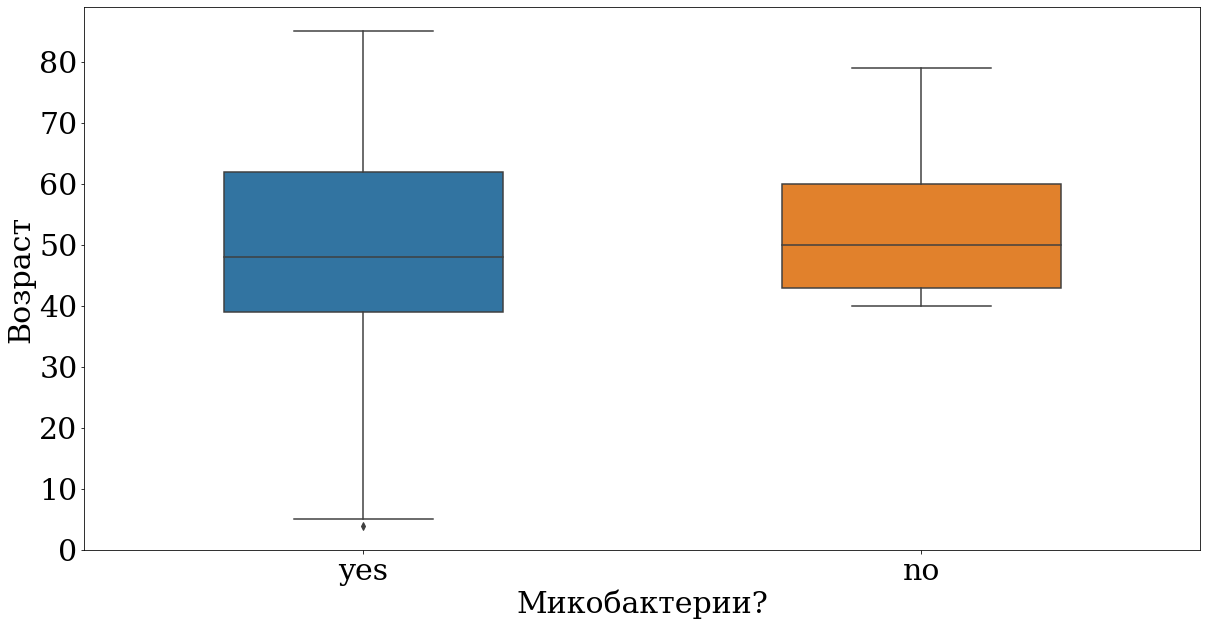

In [23]:
figure(figsize = (20, 10))
sns.boxplot(x = 'is_micro', y = 'age', data = data, width = 0.5).set(xlabel = 'Микобактерии?', ylabel = 'Возраст')
plt.savefig(media_dir + 'micro.png')

In [24]:
micro_data = data.loc[(data.is_micro == 'yes'), 'age']
non_micro_data = data.loc[(data.is_micro == 'no'), 'age']
print(scipy.stats.kruskal(micro_data, non_micro_data), '=> All populations have the same mean')
print(scipy.stats.mannwhitneyu(micro_data, non_micro_data), '=> All populations have the same mean')

KruskalResult(statistic=0.2847641155397029, pvalue=0.5935955130952422) => All populations have the same mean
MannwhitneyuResult(statistic=1795.5, pvalue=0.29740942285036104) => All populations have the same mean


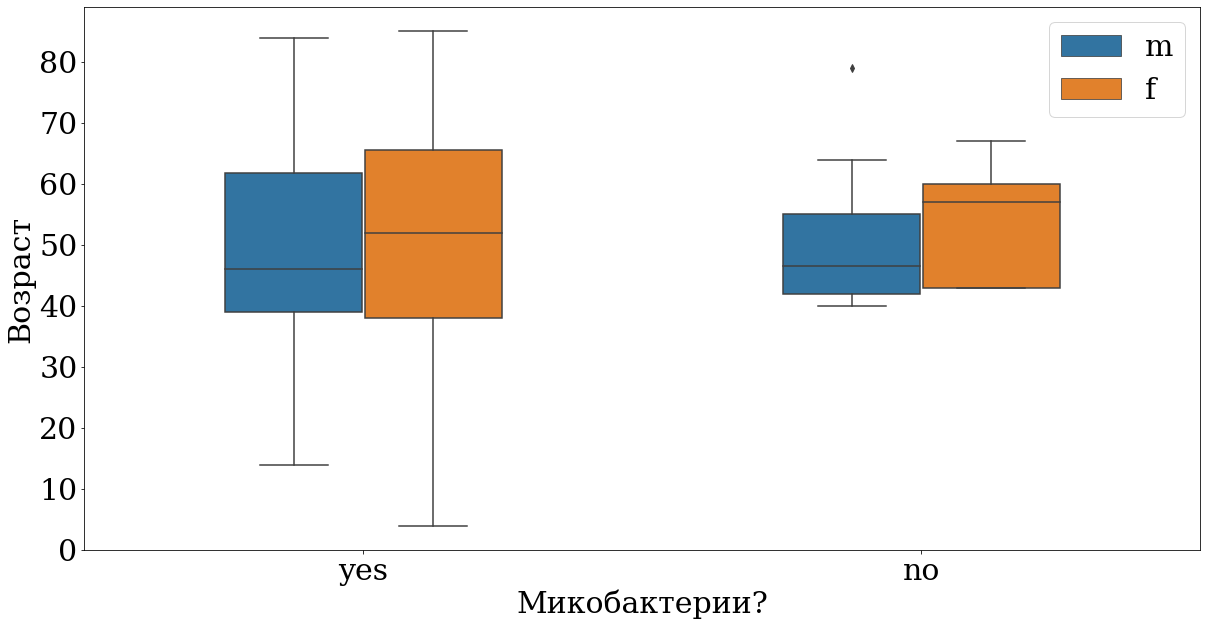

In [25]:
figure(figsize = (20, 10))
ax = sns.boxplot(x = 'is_micro', y = 'age', hue = 'gender', data = data, width = 0.5)
ax.set(xlabel = 'Микобактерии?', ylabel = 'Возраст')
ax.legend().set_title('')
plt.savefig(media_dir + 'micro_by_gender.png')

In [26]:
micro_data_male = data.loc[(data.is_micro == 'yes') & (data.gender == 'm'), 'age']
non_micro_data_male = data.loc[(data.is_micro == 'no') & (data.gender == 'm'), 'age']
print(scipy.stats.kruskal(micro_data_male, non_micro_data_male), '=> All populations have the same mean')
print(scipy.stats.mannwhitneyu(micro_data_male, non_micro_data_male), '=> All populations have the same mean')

KruskalResult(statistic=0.24591295619200237, pvalue=0.6199677077875883) => All populations have the same mean
MannwhitneyuResult(statistic=822.5, pvalue=0.31111342498511957) => All populations have the same mean


In [27]:
micro_data_female = data.loc[(data.is_micro == 'yes') & (data.gender == 'f'), 'age']
non_micro_data_female = data.loc[(data.is_micro == 'no') & (data.gender == 'f'), 'age']
print(scipy.stats.kruskal(micro_data_female, non_micro_data_female), '=> All populations have the same mean')
print(scipy.stats.mannwhitneyu(micro_data_female, non_micro_data_female), '=> All populations have the same mean')

KruskalResult(statistic=0.055903420442598196, pvalue=0.8130920039383775) => All populations have the same mean
MannwhitneyuResult(statistic=185.0, pvalue=0.4102190715685434) => All populations have the same mean


# Клиническое и не клиническое значение

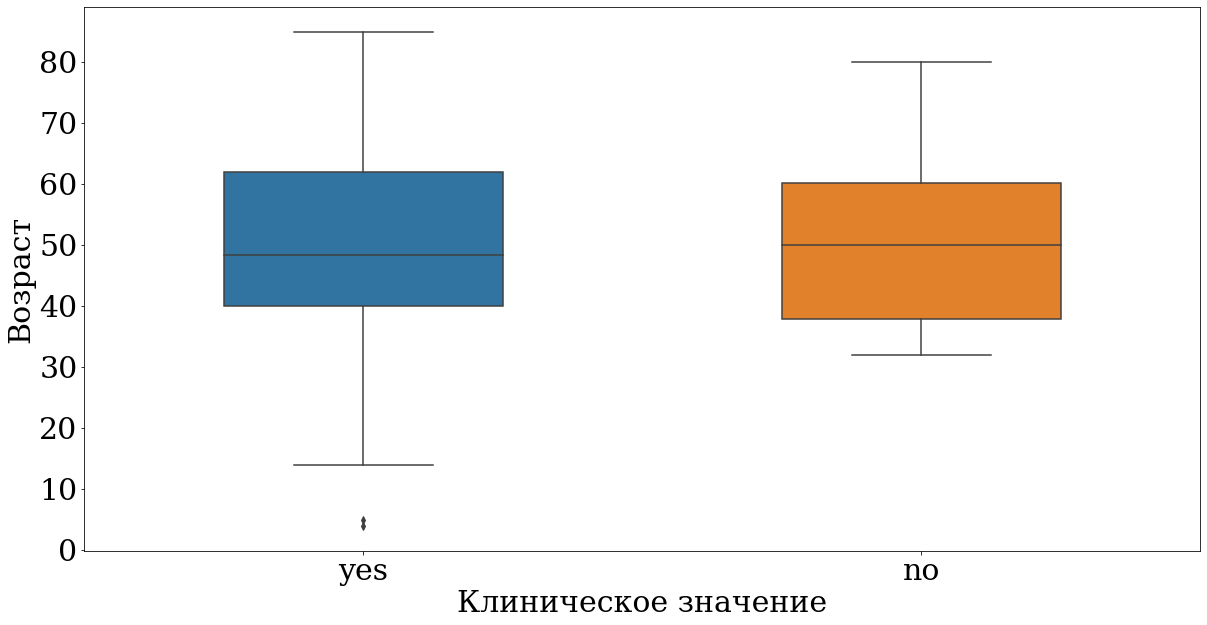

In [28]:
figure(figsize = (20, 10))
sns.boxplot(x = 'is_clinic', y = 'age', data = data, width = 0.5).set(xlabel = 'Клиническое значение', ylabel = 'Возраст')
plt.savefig(media_dir + 'clinic.png')

In [29]:
clinic_data = data.loc[data.is_clinic == 'yes', 'age']
non_clinic_data = data.loc[data.is_clinic == 'no', 'age']
print(scipy.stats.kruskal(clinic_data, non_clinic_data), '=> All populations have the same mean')
print(scipy.stats.mannwhitneyu(clinic_data, non_clinic_data), '=> All populations have the same mean')

KruskalResult(statistic=0.12363233864855253, pvalue=0.7251278351605626) => All populations have the same mean
MannwhitneyuResult(statistic=1319.5, pvalue=0.3633444690271682) => All populations have the same mean


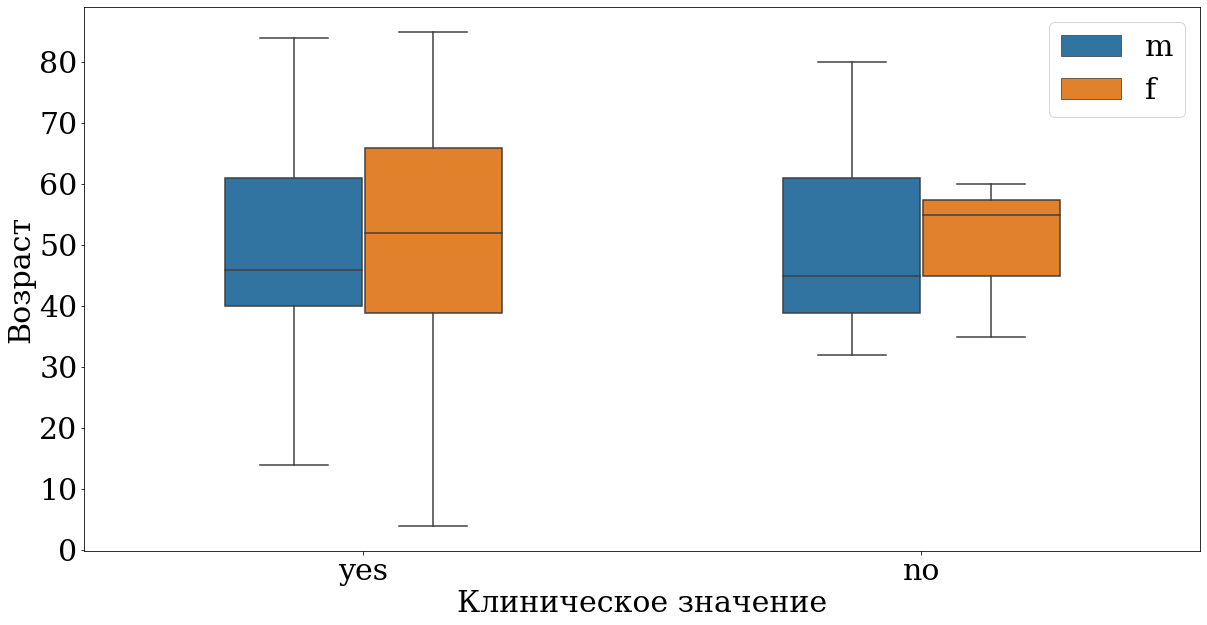

In [30]:
figure(figsize = (20, 10))
ax = sns.boxplot(x = 'is_clinic', y = 'age', hue = 'gender', data = data, width = 0.5)
ax.set(xlabel = 'Клиническое значение', ylabel = 'Возраст')
ax.legend().set_title('')
plt.savefig(media_dir + 'clinic_by_gender.png')

In [31]:
clinic_data_male = data.loc[(data.is_clinic == 'yes') & (data.gender == 'm'), 'age']
non_clinic_data_male = data.loc[(data.is_clinic == 'no') & (data.gender == 'm'), 'age']
print(scipy.stats.kruskal(clinic_data_male, non_clinic_data_male), '=> All populations have the same mean')
print(scipy.stats.mannwhitneyu(clinic_data_male, non_clinic_data_male), '=> All populations have the same mean')

KruskalResult(statistic=0.04047454340087747, pvalue=0.8405555927605457) => All populations have the same mean
MannwhitneyuResult(statistic=661.0, pvalue=0.42170836356914937) => All populations have the same mean


In [32]:
clinic_data_female = data.loc[(data.is_clinic == 'yes') & (data.gender == 'f'), 'age']
non_clinic_data_female = data.loc[(data.is_clinic == 'no') & (data.gender == 'f'), 'age']
print(scipy.stats.kruskal(clinic_data_female, non_clinic_data_female), '=> All populations have the same mean')
print(scipy.stats.mannwhitneyu(clinic_data_female, non_clinic_data_female), '=> All populations have the same mean')

KruskalResult(statistic=0.1222771144292201, pvalue=0.7265777787918379) => All populations have the same mean
MannwhitneyuResult(statistic=107.0, pvalue=0.3678234780626386) => All populations have the same mean


In [33]:
data.groupby('type').describe()

age                                                  \
                        count       mean        std   min    25%   50%    75%   
type                                                                            
Gordonia                  8.0  51.875000  13.850606  40.0  41.75  46.0  60.25   
M.abscessus               8.0  41.875000  12.755251  20.0  34.75  41.5  50.25   
M.avium                  64.0  50.765625  15.831195  14.0  39.00  46.0  62.50   
M.fortuitum              28.0  51.500000  16.489054  22.0  41.00  48.5  65.00   
M.gordonae               30.0  54.766667  19.554845  14.0  39.50  54.0  68.00   
M.kansasii               35.0  49.485714  13.793373  27.0  38.50  47.0  59.00   
Nocardia                  6.0  52.166667   8.158840  43.0  45.50  53.0  56.00   
Tsukamurella              3.0  51.000000  13.856406  43.0  43.00  43.0  55.00   
bohemicum                 1.0  81.000000        NaN  81.0  81.00  81.0  81.00   
celatum                   1.0  45.000000        NaN  45.0  45.00  45.0  45.00   
chelonae                  1.0  59.000000        NaN  59.0  59.00  59.0  59.00   
chimaera-intracellulare  11.0  52.636364  17.019240  32.0  39.50  43.0  64.50   
flavescence               1.0  61.000000        NaN  61.0  61.00  61.0  61.00   
fredericbergense          2.0  45.000000  14.142136  35.0  40.00  45.0  50.00   
gastrii                   1.0  45.000000        NaN  45.0  45.00  45.0  45.00   
interjectum               1.0  60.000000        NaN  60.0  60.00  60.0  60.00   
iranicum                  1.0  46.000000        NaN  46.0  46.00  46.0  46.00   
lentiflavum               3.0  44.666667  13.613719  34.0  37.00  40.0  50.00   
malmoense                 6.0  54.000000  16.346253  39.0  40.50  50.5  63.50   
marseillense              1.0  46.000000        NaN  46.0  46.00  46.0  46.00   
monacense                 1.0  61.000000        NaN  61.0  61.00  61.0  61.00   
peregrinum               12.0  49.416667  16.500459  28.0  32.50  50.5  63.50   
pseudoshottsii            2.0  24.000000  28.284271   4.0  14.00  24.0  34.00   
scrofulaceum              1.0  59.000000        NaN  59.0  59.00  59.0  59.00   
senegalense               4.0  61.500000  16.031220  50.0  50.00  56.0  67.50   
seoulense                 1.0  42.000000        NaN  42.0  42.00  42.0  42.00   
septicum                  8.0  50.750000  17.136011  32.0  37.50  49.0  61.00   
szulgai                   4.0  42.750000  26.825050   5.0  35.75  49.0  56.00   
xenopi                    1.0  51.000000        NaN  51.0  51.00  51.0  51.00   

                               
                          max  
type                           
Gordonia                 79.0  
M.abscessus              60.0  
M.avium                  82.0  
M.fortuitum              85.0  
M.gordonae               84.0  
M.kansasii               82.0  
Nocardia                 64.0  
Tsukamurella             67.0  
bohemicum                81.0  
celatum                  45.0  
chelonae                 59.0  
chimaera-intracellulare  80.0  
flavescence              61.0  
fredericbergense         55.0  
gastrii                  45.0  
interjectum              60.0  
iranicum                 46.0  
lentiflavum              60.0  
malmoense                79.0  
marseillense             46.0  
monacense                61.0  
peregrinum               69.0  
pseudoshottsii           44.0  
scrofulaceum             59.0  
senegalense              84.0  
seoulense                42.0  
septicum                 80.0  
szulgai                  68.0  
xenopi                   51.0

In [34]:
data.age.describe()

count    246.000000
mean      50.930894
std       15.991812
min        4.000000
25%       40.000000
50%       48.500000
75%       62.000000
max       85.000000
Name: age, dtype: float64